In [1]:
!source env/bin/activate

**Importing libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize, sent_tokenize, wordpunct_tokenize, TreebankWordTokenizer, TweetTokenizer, MWETokenizer
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from os import path
sns.set()
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import calendar
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline
import time

**Importing CSV files**

In [3]:
train_df = pd.read_csv("project_training_data_with_class_labels.csv", error_bad_lines=False)

/tmp/ipykernel_3767946/2147414233.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  train_df = pd.read_csv("project_training_data_with_class_labels.csv", error_bad_lines=False)
b'Skipping line 36926: expected 4 fields, saw 5\nSkipping line 72352: expected 4 fields, saw 5\nSkipping line 104352: expected 4 fields, saw 5\n'
b'Skipping line 202373: expected 4 fields, saw 5\nSkipping line 207923: expected 4 fields, saw 5\n'
b'Skipping line 309632: expected 4 fields, saw 5\n'
b'Skipping line 409346: expected 4 fields, saw 5\n'
b'Skipping line 651860: expected 4 fields, saw 5\n'
b'Skipping line 664720: expected 4 fields, saw 5\nSkipping line 734905: expected 4 fields, saw 5\n'
b'Skipping line 790510: expected 4 fields, saw 5\n'


In [4]:
train_df 

,ID,Comments,Parent Comments,Class Labels
0,ocxtitan,Central Illinois,Jesus; where do you live?,non-sarcastic
1,LeChuckly,To think - CNN used to be the acronym synonymo...,Even The CNN Staff Is Sick Of The Wall-To-Wall...,non-sarcastic
2,throwitskrub8,But then again; you have to consider that all ...,agree to that part.It can also mean that gujra...,non-sarcastic
3,fresherthanyouuu,ughhhhh,If a guy told you he doesn't use social media ...,non-sarcastic
4,_kushagra,I should've put the,No; it's just a programming bug. After all; th...,sarcastic
...,...,...,...,...
808085,Arectarius,50% hp/def elgif; impiety orb; bourn jewel che...,Hate to break it to you; but Gloomy can't do a...,sarcastic
808086,dale1v,Rubicon Mango.,Hey Reddit; if you could only drink one flavor...,non-sarcastic
808087,Semyonov,Essentially GAP insurance right?,I'm sure you can pay for it. Most insurance pl...,non-sarcastic
808088,futalover99,Yeah; but sometimes that weird kid keeps tryin...,Ive been subscribed to that for a while; and a...,non-sarcastic


**Cleaning the dataset**

In [5]:
df1 = train_df[train_df.isna().any(axis=1)]

In [6]:
df1

,ID,Comments,Parent Comments,Class Labels
8917,self_defeating,NaN,Because we have chosen them as sources of mind...,sarcastic
9396,Khvostov_7g-02,NaN,woah; thanks.,non-sarcastic
9469,roybringus,NaN,I am just shocked an upstanding group like thi...,sarcastic
39976,MObaid27,NaN,Bebe is a beautiful &amp; wonderfully gifted f...,sarcastic
41499,abdiascoronel,"Said the bruised ego.,Pretending to be an idi...",non-sarcastic,NaN
56037,texasboyf150,Going on about they lives...that's an opinion ...,non-sarcastic,NaN
84428,CenaW,NaN,thanks Democrats.,sarcastic
88537,IndigenousOres,NaN,Lol you didn't got it,sarcastic
104232,roguetroll,"But it's wint... *falls over leg* DAMN IT!,*st...",sarcastic,NaN
127616,mattindustries,NaN,Droids are just objectively better. Doesn't ta...,sarcastic


In [7]:
df5= train_df.dropna()

In [8]:
df5.rename(columns = {' Class Labels ':'label'}, inplace = True)

/tmp/ipykernel_3767946/4288661854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.rename(columns = {' Class Labels ':'label'}, inplace = True)


In [9]:
df5['label'].replace(['non-sarcastic','sarcastic'],[1,0], inplace = True)

/tmp/ipykernel_3767946/864785083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['label'].replace(['non-sarcastic','sarcastic'],[1,0], inplace = True)


In [10]:
df5.head()

,ID,Comments,Parent Comments,label
0,ocxtitan,Central Illinois,Jesus; where do you live?,1
1,LeChuckly,To think - CNN used to be the acronym synonymo...,Even The CNN Staff Is Sick Of The Wall-To-Wall...,1
2,throwitskrub8,But then again; you have to consider that all ...,agree to that part.It can also mean that gujra...,1
3,fresherthanyouuu,ughhhhh,If a guy told you he doesn't use social media ...,1
4,_kushagra,I should've put the,No; it's just a programming bug. After all; th...,0


In [11]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808031 entries, 0 to 808089
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ID               808031 non-null  object
 1   Comments         808031 non-null  object
 2   Parent Comments  808031 non-null  object
 3   label            808031 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 30.8+ MB


**Exploratory Data Analysis**

In [12]:
# to check number of sarcastic and non-sarcastic comments
df5['label'].value_counts()

0    404020
1    404011
Name: label, dtype: int64

Almost equal number of sarcastic and non-sarcastic comments.

In [13]:
print(df5['label'].value_counts()/len(df5))

0    0.500006
1    0.499994
Name: label, dtype: float64


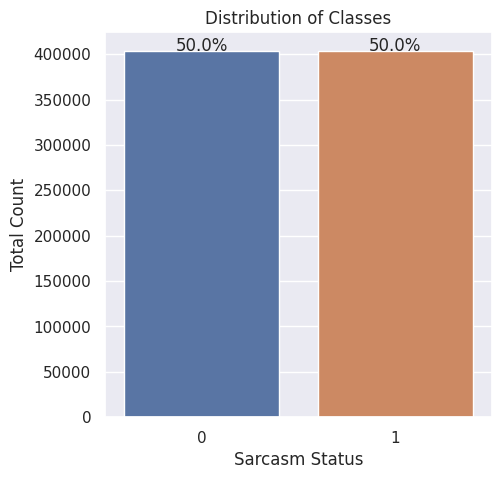

In [14]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='label',  data= df5)
ax.set(title = "Distribution of Classes", xlabel="Sarcasm Status", ylabel = "Total Count")
total = float(len(train_df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format((height/total)*100),
            ha="center") 
plt.show()

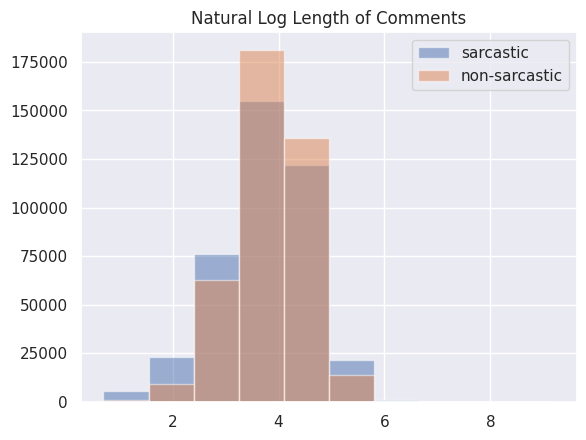

In [15]:
# To check if there is any relation between the length of the comment and its label
#train_df.loc[train_df,'Comments'].str.len().apply(np.log1p).hist(label='sarcastic,alpha=.5)
df5.loc[df5['label']==1,'Comments'].str.len().apply(np.log1p).hist(label='sarcastic', alpha=.5)
df5.loc[df5['label']==0,'Comments'].str.len().apply(np.log1p).hist(label='non-sarcastic', alpha=.5)
plt.legend()
plt.title('Natural Log Length of Comments')
plt.show()

Sarcastic comments are normally distributed in length. Non-sarcastic comments has a right-skew.

/tmp/ipykernel_3767946/2449768073.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b= False)


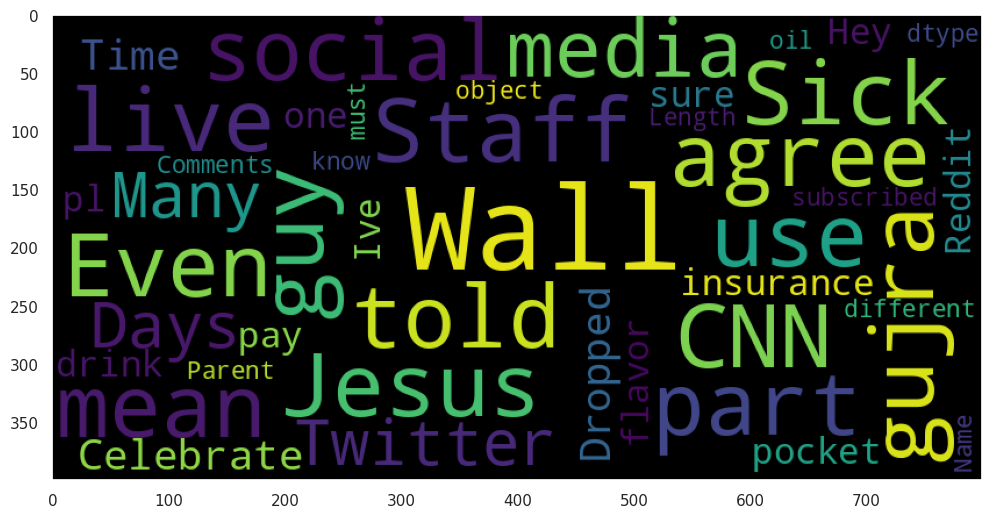

In [16]:
# Most common words in the sarcastic comments 
wordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)

plt.figure(figsize=(12, 12))
wordcloud.generate(str(df5.loc[df5['label'] == 1, 'Parent Comments']))
plt.grid(b= False)
plt.imshow(wordcloud);

In [17]:
# Comparing sarcastic comments with Parent comments
sarcasm_comm_len = np.array(df5.loc[df5['label'] == 1]['Comments'].str.len())
parent_comm_len = np.array(df5.loc[df5['label'] == 1]['Parent Comments'].str.len())
ratio_len = np.array((df5.loc[df5['label'] == 1]['Comments'].str.len())/(df5.loc[df5['label'] == 1]['Parent Comments'].str.len()))

In [18]:
d = pd.DataFrame({'Comment Length': sarcasm_comm_len, 'Parent Comment Length': parent_comm_len, 'Ratio Length': ratio_len}, columns=['Comment Length', 'Parent Comment Length', 'Ratio Length'])

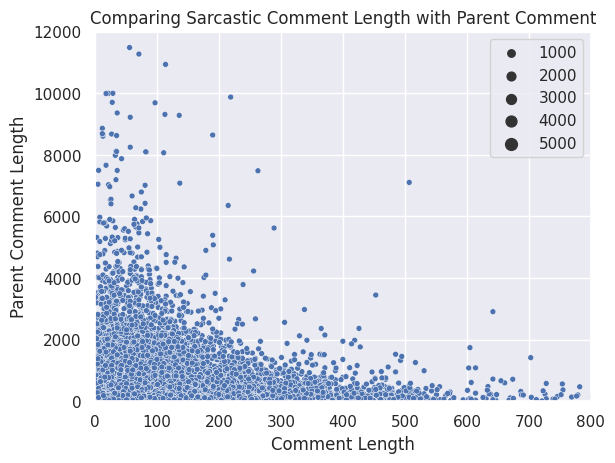

In [19]:
ax = plt.axes()
sns.scatterplot(data=d, x="Comment Length", y="Parent Comment Length",  size=ratio_len)
ax.set_title("Comparing Sarcastic Comment Length with Parent Comment")
# control x and y limits
plt.ylim(0, 12000)
plt.xlim(0, 800)
plt.show()

In [26]:
df5 = df5[:10000]

In [27]:
corpus = df5['Comments'].values.astype('U')

In [28]:
corpus

array(['Central Illinois',
       'To think - CNN used to be the acronym synonymous with news.',
       "But then again; you have to consider that all husbands suspecting adultery don't or are simply can't afford to go for a paternity test.",
       ..., 'According to what sources',
       'Wow you sure nailed it; we girls just love to gossip and anything related to reading; typing; roleplaying or using imagination is boy stuff!',
       "Both are restoring armor; can't they think of something new?"],
      dtype='<U821')

Tfidf vectorizer

Stop words removed

In [29]:
"""Tfidf vectorizer

Stop words removed
"""

#method="Binary"



#if method=="Tfidf":
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,1))
#elif method=="Binary":
    #vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=2)
    
#tfidf= TfidfVectorizer(stop_words='english', ngram_range=(1,1))

X = vectorizer.fit_transform(corpus)
#np.shape(X)

In [30]:
X

<10000x13173 sparse matrix of type '<class 'numpy.float64'>'
	with 49401 stored elements in Compressed Sparse Row format>

In [31]:
labels = df5['label'].to_list()

In [32]:
cv_dataframe=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
print(cv_dataframe)

       00  000  0035  00s   01   02   03   04   05   06  ...  zoolocks  \
0     0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
1     0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
2     0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
3     0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
4     0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
...   ...  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
9995  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
9996  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
9997  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
9998  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
9999  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   

      zoomed  zooming  zooted  zoro  zou  zumba  zunino   zx  zxcvbnm  
0        0.0      0.0     0.0   0.0  0.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
# bigram_vectorizer = CountVectorizer(ngram_range=(1, 2),token_pattern=r'\b\w+\b', min_df=1).build_analyzer()

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(corpus, labels , test_size= 0.25, random_state=42)

In [54]:
from sklearn.feature_extraction.text import TfidfTransformer

In [57]:
parameters = {'solver': [ 'lbfgs', 'liblinear', 'saga'], 'verbose': [0, 1, 2]}

# multinomial logistic regression a.k.a softmax classifier
logit = LogisticRegression(random_state= 42)

logit_classifier = GridSearchCV(logit, parameters, cv = 10, n_jobs= 4)

# sklearn's pipeline
tfidf_logit_pipeline = Pipeline([('vectorizer', vectorizer), 
('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)), ('logit_classifier', logit_classifier)])

In [58]:

start = time.time()
tfidf_logit_pipeline.fit(x_train, y_train)
end = time.time()
print(end - start) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        11076     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.67874D+03    |proj g|=  2.20066D+01


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        11076     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.67874D+03    |proj g|=  1.96812D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
11076     27     29      1     0     0   2.178D-03   3.945D+03
  F =   3944.6842050038208     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        11076     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.6

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        11076     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.67874D+03    |proj g|=  2.07950D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
11076     48     57      1     0     0   4.443D-02   3.945D+03
  F =   3945.3797312878819     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        11076     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.6

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        11076     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.67874D+03    |proj g|=  2.15891D+01


 This problem is unconstrained.



At iterate   50    f=  3.94662D+03    |proj g|=  2.49346D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
11076     50     55      1     0     0   2.493D-03   3.947D+03
  F =   3946.6238047910010     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        11076     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.67874D+03    |proj g|=  1.95696D+01


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
11076     32     38      1     0     0   3.157D-02   3.948D+03
  F =   3948.1929947789904     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        11076     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.67874D+03    |proj g|=  2.22876D+01


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
11076     33     37      1     0     0   8.011D-02   3.947D+03
  F =   3946.5770176923143     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        11076     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.67874D+03    |proj g|=  2.11146D+01


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
11076     36     42      1     0     0   5.347D-03   3.958D+03
  F =   3958.1147471059317     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        11076     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.67874D+03    |proj g|=  1.99592D+01


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
11076     37     42      1     0     0   2.871D-03   3.956D+03
  F =   3955.5306906570268     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        11076     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.67874D+03    |proj g|=  2.20066D+01

At iterate    1    f=  4.63213D+03    |proj g|=  1.37886D+02

At iterate    2    f=  4.41743D+03    |proj g|=  3.55168D+02

At iterate    3    f=  4.12979D+03    |proj g|=  4.95883D+01


 This problem is unconstrained.



At iterate    4    f=  4.08684D+03    |proj g|=  1.11463D+01

At iterate    5    f=  4.07055D+03    |proj g|=  1.12047D+01

At iterate    6    f=  4.05473D+03    |proj g|=  1.93219D+02

At iterate    7    f=  3.98095D+03    |proj g|=  8.93533D+01

At iterate    8    f=  3.95887D+03    |proj g|=  2.75060D+01

At iterate    9    f=  3.95473D+03    |proj g|=  3.46999D+00

At iterate   10    f=  3.95387D+03    |proj g|=  3.25330D+00

At iterate   11    f=  3.94757D+03    |proj g|=  7.00728D+00

At iterate   12    f=  3.94534D+03    |proj g|=  1.21043D+00

At iterate   50    f=  3.95764D+03    |proj g|=  5.35285D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate    1    f=  4.63273D+03    |proj g|=  1.40926D+02

At iterate   14    f=  3.94482D+03    |proj g|=  6.30607D-01

At iterate    2    f=  4.42398D+03    |proj g|=  3.71159D+02

At iterate    3    f=  4.12996D+03    |proj g|=  1.38719D+02

At iterate    4    f=  4.08014D+03    |proj g|=  1.31581D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
11076     24     27      1     0     0   6.660D-02   3.950D+03
  F =   3949.5575080390627     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   15    f=  3.94469D+03    |proj g|=  1.31062D+00
RUNNING THE L-BFGS-B CODE

At iterate    5    f=  4

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate    7    f=  4.03283D+03    |proj g|=  4.86454D+01

At iterate    3    f=  4.12902D+03    |proj g|=  1.31571D+02

At iterate   16    f=  3.94469D+03    |proj g|=  3.48484D-02

At iterate    4    f=  4.08071D+03    |proj g|=  1.46283D+01

At iterate    8    f=  3.99289D+03    |proj g|=  7.01257D+01

At iterate    5    f=  4.07725D+03    |proj g|=  1.08789D+01

At iterate    9    f=  3.96082D+03    |proj g|=  4.66721D+01

At iterate    6    f=  4.06976D+03    |proj g|=  1.54148D+01

At iterate   17    f=  3.94469D+03    |proj g|=  2.32043D-01

At iterate   10    f=  3.95362D+03    |proj g|=  5.78722D+00

At iterate    7    f=  4.04077D+03    |proj g|=  4.88089D+01

At iterate    8    f=  4.00314D+03    |proj g|=  7.11714D+01

At iterate   11    f=  3.95248D+03    |proj g|=  2.91955D+00

At iterate   18    f=  3.94469D+03    |proj g|=  2.67144D-01

At iterate   12    f=  3.95077D+03    |proj g|=  2.38913D+00

At iterate   19    f=  3.94469D+03    |proj g|=  3.70992D-02

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



At iterate   34    f=  3.94538D+03    |proj g|=  3.05186D-01

At iterate   21    f=  3.94739D+03    |proj g|=  1.03557D+01

At iterate   35    f=  3.94538D+03    |proj g|=  5.98116D-02

At iterate   36    f=  3.94538D+03    |proj g|=  4.22201D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        11076     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.67874D+03    |proj g|=  2.07950D+01

At iterate   37    f=  3.94538D+03    |proj g|=  2.09552D-01


 This problem is unconstrained.



At iterate    1    f=  4.63295D+03    |proj g|=  1.39757D+02

At iterate   22    f=  3.94715D+03    |proj g|=  1.44808D+01

At iterate   38    f=  3.94538D+03    |proj g|=  1.59809D-01

At iterate    2    f=  4.42659D+03    |proj g|=  3.59337D+02

At iterate   39    f=  3.94538D+03    |proj g|=  4.25243D-02

At iterate    3    f=  4.14156D+03    |proj g|=  9.09080D+01

At iterate   40    f=  3.94538D+03    |proj g|=  2.03397D-02

At iterate   41    f=  3.94538D+03    |proj g|=  1.71448D-02

At iterate    4    f=  4.09658D+03    |proj g|=  1.50951D+01

At iterate   42    f=  3.94538D+03    |proj g|=  3.70635D-02

At iterate   43    f=  3.94538D+03    |proj g|=  1.85171D-02

At iterate   23    f=  3.94701D+03    |proj g|=  3.94228D+00

At iterate   44    f=  3.94538D+03    |proj g|=  9.06504D-03

At iterate    5    f=  4.09057D+03    |proj g|=  1.18258D+01

At iterate   45    f=  3.94538D+03    |proj g|=  8.85258D-03

At iterate    6    f=  4.07032D+03    |proj g|=  2.48719D+01

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate    1    f=  4.63248D+03    |proj g|=  1.39335D+02

At iterate    2    f=  4.42184D+03    |proj g|=  3.60517D+02

At iterate    3    f=  4.13464D+03    |proj g|=  8.32432D+01

At iterate    4    f=  4.09052D+03    |proj g|=  1.40949D+01

At iterate    5    f=  4.08362D+03    |proj g|=  1.17693D+01

At iterate    8    f=  3.98818D+03    |proj g|=  7.58162D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
11076     31     36      1     0     0   1.629D-02   3.945D+03
  F =   3944.7069829692182     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate    6    f=  4.05642D+03    |proj g|=  2

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



At iterate    7    f=  4.01583D+03    |proj g|=  3.68554D+01

At iterate    9    f=  3.97134D+03    |proj g|=  1.13990D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        11076     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.67874D+03    |proj g|=  2.15891D+01

At iterate    8    f=  3.99407D+03    |proj g|=  2.35582D+02

At iterate    1    f=  4.63216D+03    |proj g|=  1.38497D+02

At iterate    9    f=  3.96401D+03    |proj g|=  1.12731D+02


 This problem is unconstrained.



At iterate    2    f=  4.41909D+03    |proj g|=  3.55355D+02

At iterate   26    f=  3.94673D+03    |proj g|=  6.50134D-01

At iterate   10    f=  3.95546D+03    |proj g|=  1.43795D+01

At iterate    3    f=  4.13508D+03    |proj g|=  5.10709D+01

At iterate   11    f=  3.95476D+03    |proj g|=  2.45292D+00

At iterate   12    f=  3.95428D+03    |proj g|=  5.03088D+00

At iterate   27    f=  3.94672D+03    |proj g|=  1.48961D+00

At iterate    4    f=  4.09338D+03    |proj g|=  1.17344D+01


At iterate    5    f=  4.07795D+03    |proj g|=  1.18310D+01
At iterate   10    f=  3.96309D+03    |proj g|=  1.33671D+01

At iterate    6    f=  4.05551D+03    |proj g|=  2.27784D+02

At iterate   13    f=  3.95190D+03    |proj g|=  1.27682D+01

At iterate   14    f=  3.94991D+03    |proj g|=  9.28132D+00

At iterate   15    f=  3.94905D+03    |proj g|=  2.12652D+00

At iterate    7    f=  3.98586D+03    |proj g|=  9.95194D+01

At iterate   28    f=  3.94671D+03    |proj g|=  2.84219D+00

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



At iterate   41    f=  3.94663D+03    |proj g|=  4.10297D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        11076     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.67874D+03    |proj g|=  1.95696D+01

At iterate    1    f=  4.63653D+03    |proj g|=  1.72774D+02

At iterate   27    f=  3.94658D+03    |proj g|=  9.93033D-02

At iterate    2    f=  4.49778D+03    |proj g|=  3.53455D+02


 This problem is unconstrained.



At iterate   23    f=  3.95559D+03    |proj g|=  1.59636D-01

At iterate   42    f=  3.94663D+03    |proj g|=  3.59402D-02

At iterate   28    f=  3.94658D+03    |proj g|=  2.85672D-01

At iterate    3    f=  4.19770D+03    |proj g|=  2.80676D+02

At iterate    4    f=  4.13131D+03    |proj g|=  1.53768D+02

At iterate    5    f=  4.08931D+03    |proj g|=  4.49268D+01

At iterate   29    f=  3.94658D+03    |proj g|=  5.33791D-02

At iterate   43    f=  3.94662D+03    |proj g|=  2.69453D-02

At iterate   24    f=  3.95558D+03    |proj g|=  1.25665D+00

At iterate    6    f=  4.08490D+03    |proj g|=  2.35648D+01

At iterate    7    f=  4.07898D+03    |proj g|=  1.17132D+01

At iterate   30    f=  3.94658D+03    |proj g|=  1.66690D-02

At iterate   31    f=  3.94658D+03    |proj g|=  1.13014D-01


At iterate   44    f=  3.94662D+03    |proj g|=  3.15697D-01
At iterate    8    f=  4.04997D+03    |proj g|=  2.52636D+01

At iterate   25    f=  3.95556D+03    |proj g|=  2.27945D-01

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate   47    f=  3.94662D+03    |proj g|=  5.66443D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        11076     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.67874D+03    |proj g|=  2.22876D+01

At iterate   15    f=  3.95895D+03    |proj g|=  1.24953D+01

At iterate   27    f=  3.95554D+03    |proj g|=  1.57855D+00

At iterate   16    f=  3.95861D+03    |proj g|=  6.38742D+00

At iterate    1    f=  4.63570D+03    |proj g|=  1.69659D+02

At iterate    2    f=  4.49230D+03    |proj g|=  3.43872D+02

At iterate    3    f=  4.19968D+03    |proj g|=  2.06480D+02

At iterate   28    f=  3.95554D+03    |proj g|=  2.02572D-01

At iterate    4    f=  4.10387D+03    |proj g|=  3.53113D+01

At iterate    5    f=  4.09759D+03    |proj g|=  1.89862D+01

At iterate   48    f=  3.94662D+03    |proj g|=  4.69531D-02

At iterate   17    f=  3.95835D+03    |proj g|=  3.95670D-01

At iterate    6    f=  4.0

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



At iterate   22    f=  3.95815D+03    |proj g|=  1.15393D+00

At iterate   13    f=  3.96549D+03    |proj g|=  2.83741D+01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        11076     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.67874D+03    |proj g|=  2.11146D+01

At iterate   14    f=  3.96267D+03    |proj g|=  3.08283D+01

At iterate   23    f=  3.95814D+03    |proj g|=  1.00138D+00

At iterate   32    f=  3.95553D+03    |proj g|=  9.88394D-02


 This problem is unconstrained.



At iterate   15    f=  3.96256D+03    |proj g|=  4.21876D+01

At iterate    1    f=  4.63521D+03    |proj g|=  1.67983D+02

At iterate   16    f=  3.95995D+03    |proj g|=  2.66651D+01

At iterate    2    f=  4.48519D+03    |proj g|=  3.55572D+02

At iterate    3    f=  4.18378D+03    |proj g|=  2.47059D+02

At iterate   33    f=  3.95553D+03    |proj g|=  4.49436D-02

At iterate   24    f=  3.95813D+03    |proj g|=  1.26889D+00

At iterate   17    f=  3.95894D+03    |proj g|=  7.78210D+00

At iterate   34    f=  3.95553D+03    |proj g|=  8.28929D-02

At iterate    4    f=  4.09248D+03    |proj g|=  1.79428D+02

At iterate   25    f=  3.95812D+03    |proj g|=  7.14843D-02

At iterate    5    f=  4.07839D+03    |proj g|=  5.08759D+01

At iterate   26    f=  3.95812D+03    |proj g|=  8.17047D-02

At iterate    6    f=  4.07665D+03    |proj g|=  1.21588D+01

At iterate    7    f=  4.07552D+03    |proj g|=  1.19798D+01

At iterate   27    f=  3.95812D+03    |proj g|=  2.21672D-01

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



At iterate   20    f=  3.94475D+03    |proj g|=  4.98444D-01

At iterate   21    f=  3.94474D+03    |proj g|=  1.43291D-01

At iterate   25    f=  3.95776D+03    |proj g|=  3.33097D-01

At iterate   22    f=  3.94471D+03    |proj g|=  1.15549D-01

At iterate   23    f=  3.94471D+03    |proj g|=  6.49050D-01

At iterate   26    f=  3.95773D+03    |proj g|=  2.25376D-01

At iterate   24    f=  3.94471D+03    |proj g|=  7.35503D-01

At iterate   35    f=  3.95811D+03    |proj g|=  4.31876D-04

At iterate   25    f=  3.94471D+03    |proj g|=  1.57150D-02

At iterate   27    f=  3.95773D+03    |proj g|=  1.76456D+00

At iterate   36    f=  3.95811D+03    |proj g|=  5.34724D-03

At iterate   26    f=  3.94471D+03    |proj g|=  2.80681D-02

           * * *

At iterate   28    f=  3.95766D+03    |proj g|=  2.50990D-01

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s finished
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s finished


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        11076     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.67874D+03    |proj g|=  1.99592D+01

At iterate   29    f=  3.94471D+03    |proj g|=  3.63635D-02

At iterate   30    f=  3.94471D+03    |proj g|=  4.54740D-03

At iterate   31    f=  3.94471D+03    |proj g|=  1.62897D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
11076     31     36      1     0     0   1.629D-02   3.945D+03
  F =   3944.7069829692182     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s finished


iter  5 act 6.862e-06 pre 6.861e-06 delta 3.026e+01 f 3.958e+03 |g| 5.392e-03 CG   4
[LibLinear]iter  1 act 7.265e+02 pre 7.154e+02 delta 3.001e+01 f 4.679e+03 |g| 5.419e+01 CG   4
iter  2 act 7.421e+00 pre 7.240e+00 delta 3.001e+01 f 3.952e+03 |g| 1.075e+01 CG   4
iter  2 act 2.923e+00 pre 2.799e+00 delta 3.025e+01 f 3.961e+03 |g| 8.510e+00 CG   3
iter  2 act 3.337e+00 pre 3.178e+00 delta 3.034e+01 f 3.950e+03 |g| 8.952e+00 CG   3
iter  3 act 9.516e-02 pre 9.448e-02 delta 3.001e+01 f 3.945e+03 |g| 1.247e+00 CG   3
iter  4 act 2.408e-03 pre 2.407e-03 delta 3.001e+01 f 3.945e+03 |g| 1.014e-01 CG   4
iter  5 act 3.698e-06 pre 3.698e-06 delta 3.001e+01 f 3.945e+03 |g| 4.183e-03 CG   4
iter  3 act 1.248e-01 pre 1.239e-01 delta 3.025e+01 f 3.958e+03 |g| 1.080e+00 CG   4
[LibLinear]iter  1 act 7.261e+02 pre 7.163e+02 delta 3.035e+01 f 4.679e+03 |g| 5.382e+01 CG   5
iter  2 act 2.926e+00 pre 2.792e+00 delta 3.035e+01 f 3.953e+03 |g| 8.138e+00 CG   3
iter  3 act 1.219e-01 pre 1.210e-01 delta 3

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[P

Epoch 11, change: 0.02399187
Epoch 12, change: 0.07486672
Epoch 13, change: 0.01465907
Epoch 14, change: 0.00976210
Epoch 15, change: 0.00731452
Epoch 5, change: 0.18935712
Epoch 16, change: 0.00253024
Epoch 17, change: 0.00258237
Epoch 6, change: 0.12521129
Epoch 18, change: 0.00096255
Epoch 7, change: 0.08488273
Epoch 19, change: 0.00218210
Epoch 8, change: 0.13608461
Epoch 5, change: 0.17936945
Epoch 20, change: 0.00040107
Epoch 9, change: 0.09106915
Epoch 6, change: 0.12136403
Epoch 21, change: 0.00024950
Epoch 7, change: 0.08997795
Epoch 22, change: 0.00045059
Epoch 8, change: 0.12910992
Epoch 23, change: 0.00044528
Epoch 24, change: 0.00018294
convergence after 25 epochs took 0 seconds

At iterate   18    f=  3.94971D+03    |proj g|=  1.34907D+00
Epoch 9, change: 0.08502255
Epoch 10, change: 0.02819738
Epoch 10, change: 0.02835997
Epoch 11, change: 0.02361680
Epoch 11, change: 0.02140991
Epoch 12, change: 0.07465572
Epoch 13, change: 0.01342733
Epoch 14, change: 0.00960266
Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 15, change: 0.01030487
Epoch 6, change: 0.09337338
Epoch 16, change: 0.00358266
Epoch 7, change: 0.12057847
Epoch 23, change: 0.00032517
Epoch 17, change: 0.00213571
convergence after 24 epochs took 0 seconds
Epoch 8, change: 0.11875426
Epoch 9, change: 0.06354791
Epoch 18, change: 0.00072161
Epoch 19, change: 0.00094069
Epoch 1, change: 1.00000000
Epoch 20, change: 0.00041491
Epoch 2, change: 0.38106112
Epoch 21, change: 0.00099817
Epoch 3, change: 0.22480126
Epoch 22, change: 0.00023565
Epoch 4, change: 0.18030994
Epoch 23, change: 0.00012835
Epoch 5, change: 0.19097428
Epoch 10, change: 0.02308283
convergence after 24 epochs took 0 secondsEpoch 6, change: 0.17537174
Epoch 7, change: 0.14823720
Epoch 8, change: 0.08668792
Epoch 9, change: 0.07764628
Epoch 10, change: 0.02470623
Epoch 11, change: 0.01863197
Epoch 12, change: 0.07395125
Epoch 11, change: 0.02922881
Epoch 13, change: 0.00973574
Epoch 12, change: 0.05961761

Epoch 14, change: 0.00790966
Epoch 15, change: 0.01008815

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0

Epoch 7, change: 0.08739188
Epoch 1, change: 1.00000000
Epoch 8, change: 0.12938302
Epoch 17, change: 0.00258237
Epoch 2, change: 0.38444621
Epoch 9, change: 0.08873388
Epoch 18, change: 0.00096255
Epoch 3, change: 0.20911497
Epoch 10, change: 0.02079986
Epoch 19, change: 0.00218210
Epoch 4, change: 0.18783627
Epoch 11, change: 0.01783258
Epoch 20, change: 0.00040107
Epoch 12, change: 0.06950891
Epoch 21, change: 0.00024950
Epoch 22, change: 0.00045059
Epoch 13, change: 0.01047607
Epoch 14, change: 0.00717779
Epoch 23, change: 0.00044528
Epoch 5, change: 0.16961799
Epoch 15, change: 0.00889164
Epoch 16, change: 0.00296689
Epoch 6, change: 0.10821149
Epoch 17, change: 0.00234632
Epoch 18, change: 0.00067331
Epoch 7, change: 0.08362588
Epoch 24, change: 0.00018294
Epoch 19, change: 0.00185351
Epoch 8, change: 0.14113076
convergence after 25 epochs took 0 seconds
Epoch 20, change: 0.00029524
Epoch 9, change: 0.08612131
Epoch 10, change: 0.02099888
Epoch 21, change: 0.00071479
Epoch 22, ch

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s finished


66.14130115509033


In [59]:
#from numba import jit, cuda

In [60]:
# @jit(target_backend='cuda')    
# def tfidf_pipeline(x_train, y_train):
#     start = time.time()
#     tfidf_logit_pipeline.fit(x_train, y_train)
#     end = time.time()
#     print(end - start)  
    
# tfidf_pipeline(x_train, y_train)

In [61]:
print(logit_classifier.best_params_)
print(logit_classifier.best_score_)

{'solver': 'lbfgs', 'verbose': 0}
0.6026666666666666


In [63]:
# @jit(target_backend='cuda')    
# def pred_tfidf(x_test):
#     return tfidf_logit_pipeline.predict(x_test)

#  pred_tfidf(x_test)

In [64]:
accuracy_score(y_test, valid_pred)

0.6076

In [72]:
# Getting the accuracy metric
acc = accuracy_score(valid_pred, y_test)
pre = precision_score(valid_pred, y_test, average = 'micro')
rec = recall_score(valid_pred, y_test)
f1 = f1_score(valid_pred, y_test)
micro_f1 = f1_score(valid_pred, y_test, average = 'micro')

print ('Model Performance Statistic Suite-1: ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(y_test,valid_pred)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

Model Performance Statistic Suite-1: 
Accuracy:  0.6076
Precision:  0.6076
Recall:  0.59375
F1 Score:  0.6193247962747381
Micro f1:  0.6076
Sensitivity :  0.6237024221453287
Specificity :  0.59375


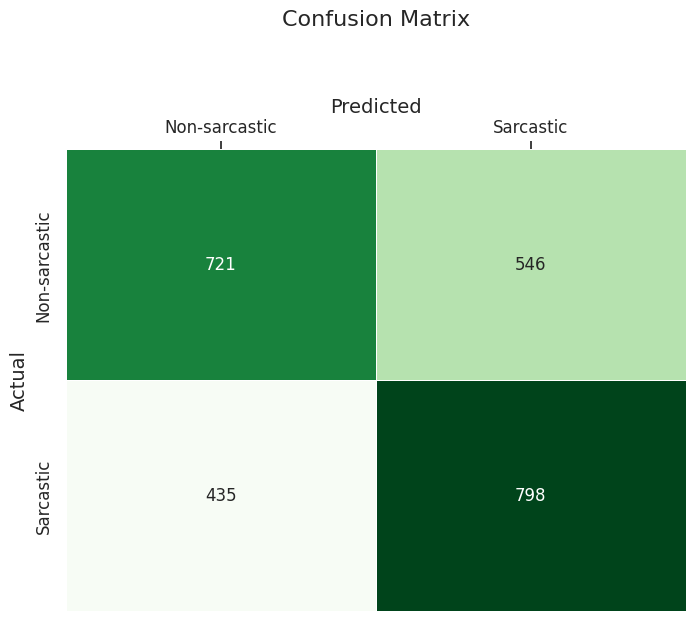

In [73]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

In [74]:
from sklearn.svm import SVC

In [76]:
# # def stemmed_words(doc):
#       return (PorterStemmer().stem(w) for w in analyzer(doc))

# def lemmatized_words(doc):
#   return (WordNetLemmatizer().lemmatize(w) for w in analyzer(doc))

In [79]:
train_x, test_x, train_y, test_y = train_test_split(corpus, labels, test_size=0.20, random_state=42,stratify=labels)
#Classifier

clf=SVC()

clf_parameters = {'clf__kernel':('linear', 'poly'),#, 'rbf', 'sigmoid'),
                  'clf__C' : (0,1),#,3,5,10),
                  }    
        
#Feature Extraction
pipeline = Pipeline([
('vect', CountVectorizer(token_pattern=r'\b\w+\b')),
('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
('clf', clf),]) 
    


#Classificaion
parameters={**clf_parameters} 
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=10)          
grid.fit(train_x,train_y)     
clf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(clf)

predicted = clf.predict(test_x)
predicted =list(predicted)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 251, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr

********* Best Set of Parameters ********* 


Pipeline(steps=[('vect', CountVectorizer(token_pattern='\\b\\w+\\b')),
                ('tfidf', TfidfTransformer()),
                ('clf', SVC(C=1, kernel='poly'))])


In [81]:
accuracy_score(test_y, predicted)

0.613

In [82]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-2: ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(predicted, test_y)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

Model Performance Statistic Suite-2: 
Accuracy:  0.613
Precision:  0.613
Recall:  0.6054613935969868
F1 Score:  0.6242718446601943
Micro f1:  0.613
Sensitivity :  0.5818363273453094
Specificity :  0.6442885771543087


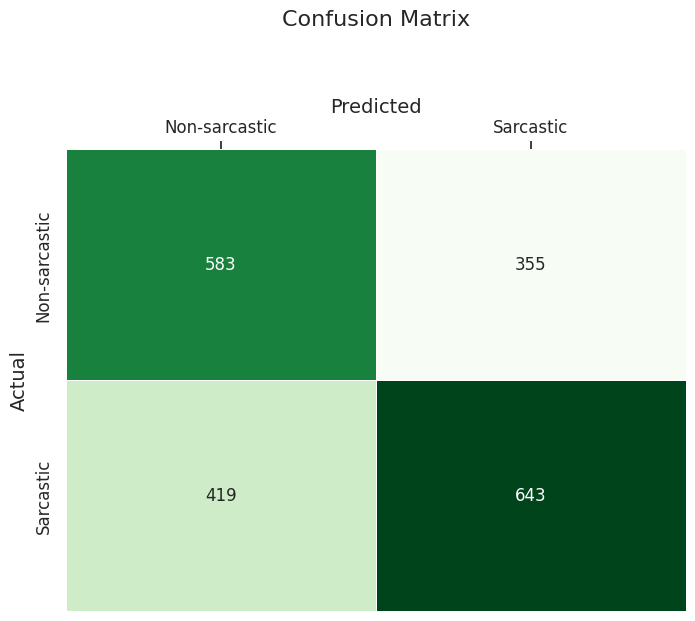

In [83]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

In [84]:
from sklearn.naive_bayes import MultinomialNB

In [85]:
train_x, test_x, train_y, test_y = train_test_split(corpus, labels, test_size=0.20, random_state=42,stratify=labels)
#Classifier

clf=MultinomialNB(fit_prior=True, class_prior=None)


clf_parameters = {'clf__alpha':(0,1,2),}   
        
#Feature Extraction
pipeline = Pipeline([
('vect', CountVectorizer(token_pattern=r'\b\w+\b')),
('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
('clf', clf),]) 
    


#Classificaion
parameters={**clf_parameters} 
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=10)          
grid.fit(train_x,train_y)     
clf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(clf)

predicted = clf.predict(test_x)
predicted =list(predicted)


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  w

********* Best Set of Parameters ********* 


Pipeline(steps=[('vect', CountVectorizer(token_pattern='\\b\\w+\\b')),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=2))])


In [86]:
accuracy_score(test_y, predicted)

0.5985

In [88]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-3: ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(predicted, test_y)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

Model Performance Statistic Suite-3: 
Accuracy:  0.5985
Precision:  0.5985
Recall:  0.6162097735399285
F1 Score:  0.562874251497006
Micro f1:  0.5985
Sensitivity :  0.6786427145708582
Specificity :  0.5180360721442886


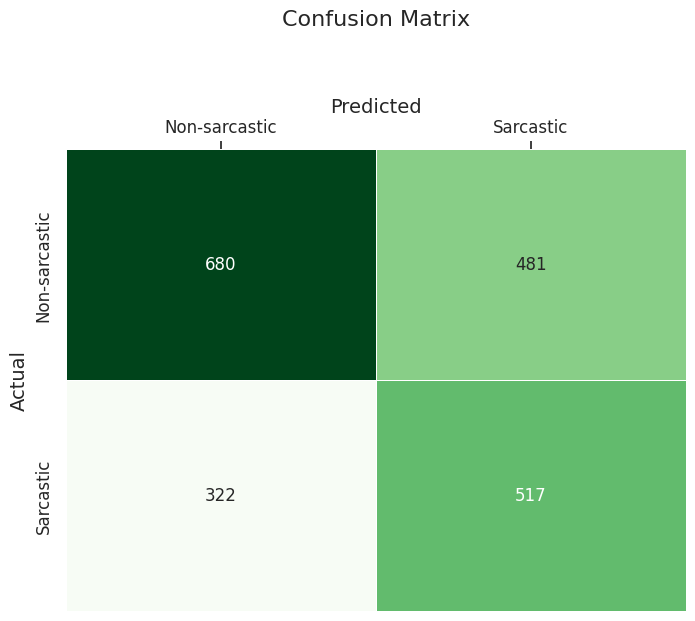

In [89]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

Stemming applied to comments 

In [90]:
analyzer = CountVectorizer().build_analyzer()
def stemmed_words(doc):
  return (PorterStemmer().stem(w) for w in analyzer(doc))

In [92]:
clf=MultinomialNB(alpha=0,fit_prior=True, class_prior=None)  
vectorizer=TfidfVectorizer(analyzer = stemmed_words,ngram_range=(1,1),token_pattern=r'\b\w+\b')
tfidf = vectorizer.fit_transform(corpus)
tfidf = tfidf.toarray()

In [93]:
train_x, test_x, train_y, test_y = train_test_split(tfidf, labels, test_size=0.20, random_state=42,stratify=labels)

In [94]:
clf.fit(train_x,train_y)
predicted = clf.predict(test_x)
predicted =list(predicted)

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [95]:
accuracy_score(test_y, predicted)

0.571

In [96]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-4: ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(predicted, test_y)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

Model Performance Statistic Suite-4: 
Accuracy:  0.571
Precision:  0.571
Recall:  0.5704225352112676
F1 Score:  0.5692771084337349
Micro f1:  0.571
Sensitivity :  0.5738522954091816
Specificity :  0.5681362725450901


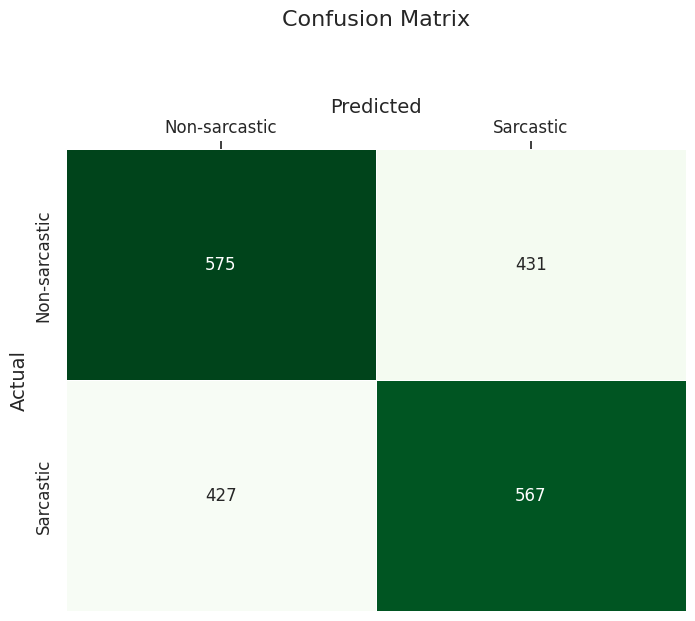

In [97]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

Lemmatization applied to comments

In [98]:
from nltk.stem import WordNetLemmatizer

In [99]:
analyzer = CountVectorizer().build_analyzer()
def lemmatized_words(doc):
  return (WordNetLemmatizer().lemmatize(w) for w in analyzer(doc))

In [100]:
clf=MultinomialNB(alpha=0,fit_prior=True, class_prior=None)  
vectorizer=TfidfVectorizer(analyzer = lemmatized_words,ngram_range=(1,1),token_pattern=r'\b\w+\b')
tfidf = vectorizer.fit_transform(corpus)
tfidf = tfidf.toarray()
# Training and Test Split           
  
train_x, test_x, train_y, test_y = train_test_split(tfidf, labels, test_size=0.20, random_state=42,stratify=labels)

#Classificaion    
clf.fit(train_x,train_y)
predicted = clf.predict(test_x)
predicted =list(predicted)

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [101]:
accuracy_score(test_y, predicted)

0.568

In [103]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-5: ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(predicted, test_y)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

Model Performance Statistic Suite-5: 
Accuracy:  0.568
Precision:  0.568
Recall:  0.5682281059063137
F1 Score:  0.5636363636363636
Micro f1:  0.568
Sensitivity :  0.5768463073852296
Specificity :  0.5591182364729459


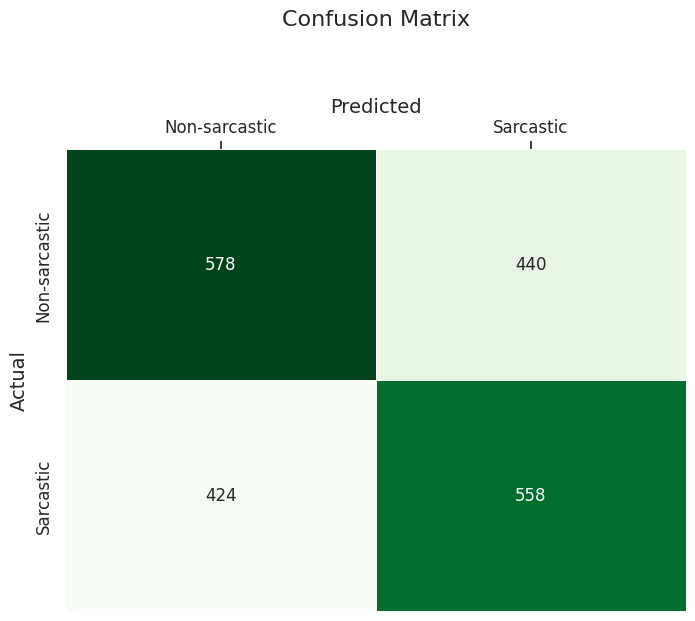

In [104]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

Without removing stopwords

In [105]:
clf=MultinomialNB(alpha=0,fit_prior=True, class_prior=None)  
vectorizer=TfidfVectorizer(ngram_range=(1,1),token_pattern=r'\b\w+\b')
tfidf = vectorizer.fit_transform(corpus)
tfidf = tfidf.toarray()
# Training and Test Split           
  
train_x, test_x, train_y, test_y = train_test_split(tfidf, labels, test_size=0.20, random_state=42,stratify=labels)

#Classificaion    
clf.fit(train_x,train_y)
predicted = clf.predict(test_x)
predicted =list(predicted)

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [106]:
accuracy_score(test_y, predicted)

0.562

In [108]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-6: ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(predicted, test_y)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

Model Performance Statistic Suite-6: 
Accuracy:  0.562
Precision:  0.562
Recall:  0.561
F1 Score:  0.5615615615615616
Micro f1:  0.562
Sensitivity :  0.56187624750499
Specificity :  0.5621242484969939


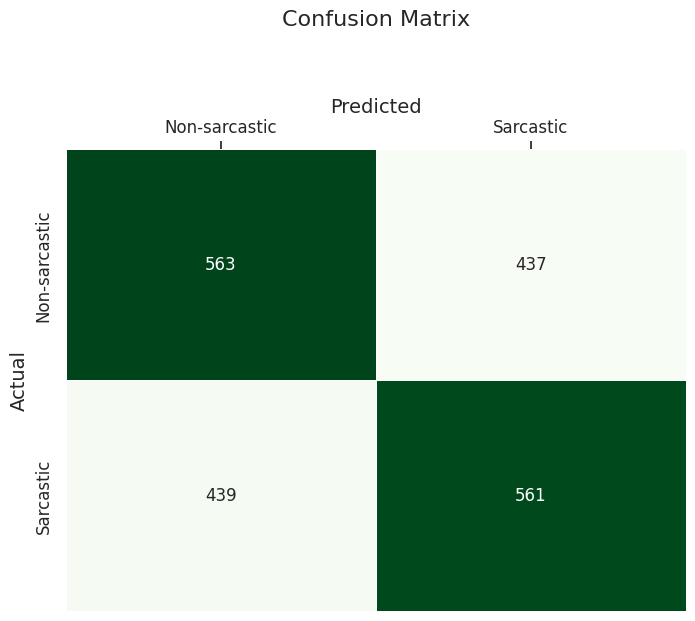

In [109]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

In [80]:
# !deactivate